# Tutorial 3 - Basic plotting

In [Tutorial 2](./tutorial-2-compare-models.ipynb), we made use of PyBaMM's automatic plotting function when comparing models. This gave a good quick overview of many of the key variables in the model. However, by passing in just a few arguments it is easy to plot any of the many other variables that may be of interest to you. We start by building and solving a model as before:

In [1]:
%pip install "pybamm[plot,cite]" -q    # install PyBaMM if it is not installed
import pybamm

model = pybamm.lithium_ion.DFN()
sim = pybamm.Simulation(model)
sim.solve([0, 3600])


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


There are many more variables available from PyBaMM models than those in the default plots. One can see a full list of the available variables by just calling the `variable_names` method:

In [2]:
model.variable_names()

['Time [s]',
 'Time [min]',
 'Time [h]',
 'x [m]',
 'x_n [m]',
 'x_s [m]',
 'x_p [m]',
 'r_n [m]',
 'r_p [m]',
 'Current variable [A]',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Throughput capacity [A.h]',
 'Discharge energy [W.h]',
 'Throughput energy [W.h]',
 'Porosity',
 'Negative electrode porosity',
 'X-averaged negative electrode porosity',
 'Separator porosity',
 'X-averaged separator porosity',
 'Positive electrode porosity',
 'X-averaged positive electrode porosity',
 'Porosity change',
 'Negative electrode porosity change [s-1]',
 'X-averaged negative electrode porosity change [s-1]',
 'Separator porosity change [s-1]',
 'X-averaged separator porosity change [s-1]',
 'Positive electrode porosity change [s-1]',
 'X-averaged positive electrode porosity change [s-1]',
 'Negative electrode interface utilisation variable',
 'X-averaged negative electrode interface utilisation variable',
 'Negative electrode interface utilisation',


There are a _lot_ of variables, however. You can also search the list of variables for a particular string (e.g. "electrolyte"), by calling:

In [3]:
model.variables.search("electrolyte")

Electrolyte concentration [Molar]
Electrolyte concentration [mol.m-3]
Electrolyte concentration concatenation [mol.m-3]
Electrolyte convection flux [mol.m-2.s-1]
Electrolyte current density [A.m-2]
Electrolyte diffusion flux [mol.m-2.s-1]
Electrolyte flux [mol.m-2.s-1]
Electrolyte migration flux [mol.m-2.s-1]
Electrolyte potential [V]
Electrolyte transport efficiency
Gradient of electrolyte potential [V.m-1]
Gradient of negative electrolyte potential [V.m-1]
Gradient of positive electrolyte potential [V.m-1]
Gradient of separator electrolyte potential [V.m-1]
Loss of lithium inventory, including electrolyte [%]
Negative electrolyte concentration [Molar]
Negative electrolyte concentration [mol.m-3]
Negative electrolyte potential [V]
Negative electrolyte transport efficiency
Positive electrolyte concentration [Molar]
Positive electrolyte concentration [mol.m-3]
Positive electrolyte potential [V]
Positive electrolyte transport efficiency
Separator electrolyte concentration [Molar]
Separat

As a first example, we choose to plot only electrolyte concentration and voltage. We assemble a list of the variable names to plot and then pass this list to the `plot` method of our simulation as the `output_variables` keyword argument:

In [4]:
output_variables = ["Electrolyte concentration [mol.m-3]", "Voltage [V]"]
sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

Note that, if we want to plot only a single variable, we still need to pass it as a list:

In [5]:
output_variables = ["Voltage [V]"]
sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

You can also plot multiple variables on the same plot by nesting lists. For example, if we want to plot electrode and electrolyte current densities in the same plot and voltage next to them, we can write:

In [6]:
sim.plot(
    [
        ["Electrode current density [A.m-2]", "Electrolyte current density [A.m-2]"],
        "Voltage [V]",
    ]
)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

PyBaMM also allows you to produce a voltage plot showing the contribution of the various overpotentials and losses by calling the `plot_votage_components` method and passing the `solution` object of the simulation as argument:

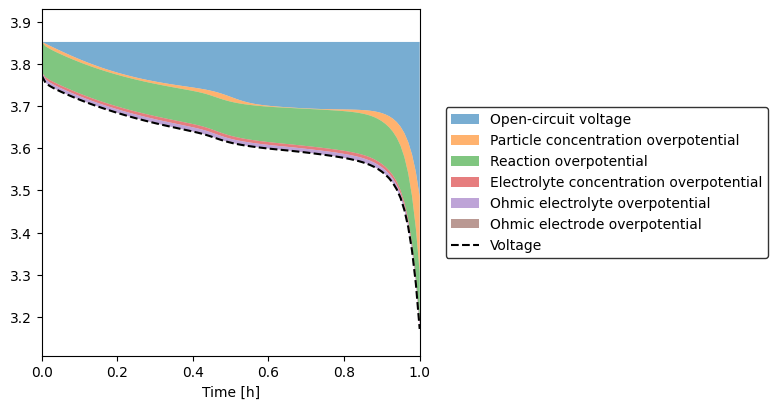

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [7]:
sim.plot_voltage_components()

The contributions can also be split by electrode by setting the keyword argument `split_by_electrode` to `True`:

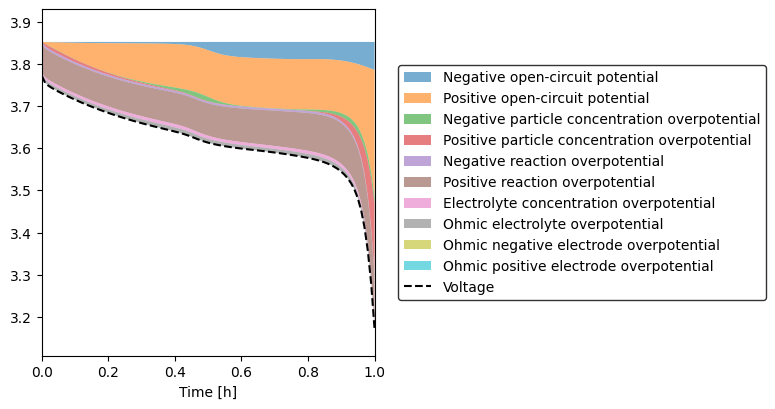

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [8]:
sim.plot_voltage_components(split_by_electrode=True)

In this tutorial we have seen how to use the in-built plotting functionality in PyBaMM. In [Tutorial 4](./tutorial-4-setting-parameter-values.ipynb) we show how to change parameter values.

## References

The relevant papers for this notebook are:

In [9]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Marc Doyle, Thomas F. Fuller, and John Newman. Modeling of galvanostatic charge and discharge of the lithium/polymer/insertion cell. Journal of the Electrochemical society, 140(6):1526–1533, 1993. doi:10.1149/1.2221597.
[3] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with NumPy. Nature, 585(7825):357–362, 2020. doi:10.1038/s41586-020-2649-2.
[4] Scott G. Marquis, Valentin Sulzer, Robert Timms, Colin P. Please, and S. Jon Chapman. An asymptotic derivation of a single particle model with electrolyte. Journal of The Electrochemical Society, 166(15):A3693–A3706, 2019. doi:10.1149/